# Machine Learning - Understanding Tensor Flow

## Introducing TensorFlow

Machine Learning Problems:

- Classification
- Regression (fitting curve to data)
- Clustering (Grouping data based on similarities)
- Rule-Extraction (if-then patterns)
Example:
Whales Classification: Are they mammal or fish
- Rule-based classfier
  - A series of rule created by experts
- ML-based Classifier
  - Creates classifier based on corpus of already tagged data
  - Information about input data is critical when trying to compare with known data
  - Very dependent on features of the training data and features of input data
 - Difference between the two types:
  - ML Based is Dynamic vs rule-base which is static
  - ML Based dont really require experts, rule-based require experts
  - ML Based reqiure a corpus of data
  - ML Based has a training step

Traditoinal ML based binary classifier
- input is a vector of features
- output is classification (label)
Modern "Representation" classifiers
- automatically determine input feature vectors

## Understanding Deep Learning

- Representation systems can figure out feature and classifications by itself during training
- The Key to the the "representation" system is the feature selection algorithm

## Deep Learning and Neural Networks

- Deep Learning: Algorithms that learn what features matter (widely used for speach and image recognition)
- Neural Networks: The most common class of deep learning algos
- NN are built up of Neurons, which are the building blocks to support "learning"

- Deep Learning systems are made up of layers:
  Example: Image Recognition
  - Pixel extraction
  - Edge Extraction
  - Corner Extraction
  - Object Part combination
 The input and output layers are the visible layers
 The middle layers are the hidden layers

 ## Introduction Of Tensorflow
 - Open source library for numerical computation using data flow graphs,
 made by Google
 - Build for distributed world (clusters, GPUS, etc)
 - Suite of software (TensorFlow Board, serving)

 ### Uses:
  - Greate for ML development
  - Has a REPL env for quick development
  - Models are easily ported to production
  - Large scale distributed models
  - Models for mobile and embedded envs

 ### Strengths

 - Easy to use Stable Python Api
 - Scalable
 - Efficient and performant
 - Great support from Google
 - Addional tools for viz and serving

### The World is a Graph

- Everything is a graph either a node or an edge
- Every node is a computation/operators
- Every edge is Data, data is transformed by nodes, also called tensors

Example: (Flow Grap)
```
----1.8----(round)--2--(multiply)--10--(add)--15
              \       /               /
               2     5               5
                \   /               /
--3.6--(flr)--3-(add)----5-----(abs)
```

In [9]:
import tensorflow as tf

hello = tf.constant('Hellow, tensorflow World!1234')

## need a session to run tensor flow
sess = tf.Session()
print(sess.run(hello))

Hellow, tensorflow World!1234


# Computation Graph
Tensor flow problems all have to be directy acyclic graphs. Cyclic graphs will never finish
## Feeback loops
Tensor flow handles feedbacks in the algorithm to make sure that the computation graph has no cycles
Cycles can be unrolled in the computation graph, repeating as much as we want. The number of times 
the graph is unrolled depends on the number of iterations.

In [10]:
# Constants are immutable in tensor flow, the name is nice for use with tensor board
a = tf.constant(6, name='constant_a')
b = tf.constant(3, name='constant_b')
c = tf.constant(10, name='constant_c')
d = tf.constant(5, name='costant_d')

In [11]:
mul = tf.multiply(a,b, name='mul')
div = tf.div(c,d,name='div')
addn = tf.add_n([mul,div],name='addn')

In [12]:
# printing is really only going to print the node/edge object information
print addn
print a

Tensor("addn_1:0", shape=(), dtype=int32)
Tensor("constant_a_2:0", shape=(), dtype=int32)


In [13]:
#Must us ehte session to run a part of the graph
sess.run(addn)

6

In [14]:
sess.run(div)

2

In [15]:
sess.run(mul)

18

In [16]:
sess.run(a)

6

In [17]:
# Use writer to write to a file, save the graph representation of the session right now
writer = tf.summary.FileWriter('./m2_example1',sess.graph)
#close these bad boy, an run the tensorboard command on the above created file to see the output
writer.close()
sess.close()

## Tensor Flow Computation
Every graph execution occurs in two steps
- computation of the graph
- execution of the graph

In [29]:
a = tf.constant(6.5, name='constant_a')
b = tf.constant(3.4, name='constant_b')
c = tf.constant(3.0, name='constant_c')
d = tf.constant(100.2, name='costant_d')
square = tf.square(a, name='square_a')
power = tf.pow(b, c, name='pow_b_c')
sqrt = tf.sqrt(d, name='sqrt_d')
final_sum = tf.add_n([square, power, sqrt], name="final_sum")
sess = tf.Session()
print "Sum of square, power, and square root ", sess.run(final_sum)
sess.close()
# Use writer to write to a file, save the graph representation of the session right now
writer = tf.summary.FileWriter('./m2_example2',sess.graph)
#close these bad boy, an run the tensorboard command on the above created file to see the output
writer.close()
sess.close()

Sum of square, power, and square root  91.563995


In [33]:
# determine the rank of the tensors
sess = tf.Session()
zeroD = tf.constant(5)
print "zeroD Rank: %d" % sess.run(tf.rank(zeroD))
oneD = tf.constant(["how","are","you?"])
print "oneD Rank: %d" % sess.run(tf.rank(oneD))
twoD = tf.constant([[1,2],[3,4]])
print "twoD Rank: %d" % sess.run(tf.rank(twoD))
sess.close()

zeroD Rank: 0
oneD Rank: 1
twoD Rank: 2


In [38]:
!pip install ujson

    100% |████████████████████████████████| 194kB 2.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/scott/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [45]:
# using multiple dimensional tensors
x = tf.constant([100,200,300], name='x')
y = tf.constant([1,2,3], name='y')
sum_x = tf.reduce_sum(x, name='sum_x')
prod_y = tf.reduce_prod(y, name='prod_y')
final_div = tf.div(sum_x,prod_y,name='final_div')
final_mean = tf.reduce_mean([sum_x,prod_y],name='mean')
sess = tf.Session()

print "mean(sum(x), prod(y)):", sess.run(final_mean)
sess.close()

mean(sum(x), prod(y)): 303


## Numpy in Tensor Flow
Tensor flow is easily able to integrate numpy data formats in algo. computations

In [52]:
import numpy as np
sess = tf.Session()
zeroD = np.array(30, dtype=np.int32)
print sess.run(tf.rank(zeroD))
oneD = np.array([1,2,3,4], dtype=np.int32)
print sess.run(tf.rank(oneD))
sess.close()

0
1


# Linear Regression

- Start with some initial value for a and b, (a+bx = y); called a_start, b_start
- Calculate the least square error from the training set and feed back into the start of the algorithm
- Calculate new values for a and b, a_i, b_i based on the squared error
- iterate until error is below some value, or change is error is below a threshold

# Placeholders

- Used by tensor flow to hold a place for variables to passed into the algorithm


In [58]:
# create a 1-D tensor that holds 3 elements called x
# using placeholders, the sum and prod methods are not known until runtime
x = tf.placeholder(tf.int32, shape=[3], name='x')
y = tf.placeholder(tf.int32, shape=[3], name='y')
sum_x = tf.reduce_sum(x, name='sum_x')
prod_y = tf.reduce_prod(y, name='prod_y')
final_div = tf.div(sum_x, prod_y, name="final_div")
sess = tf.Session()
print "Sum divided by prod: ", sess.run(final_div, feed_dict={x:[100,200,300], y:[1,2,3]})
print "Sum divided by prod2: ", sess.run(final_div, feed_dict={x:[1,2,10], y:[1,2,4]})
sess.close()

Sum divided by prod:  100
Sum divided by prod2:  1


In [62]:
#y=Wx+b, W is a constant 1-D tensor
W = tf.constant([10,100], name="W_const")
# x, b can be any shaped tensor
x = tf.placeholder(tf.int32, name='x')
b = tf.placeholder(tf.int32, name='b')
# multiply is not matrx multiplication, but element to element multiplication, and W and x need to be same shape and rank
Wx = tf.multiply(W, x, name='Wx')

y = tf.add(Wx, b, name="y")
y_ = tf.subtract(x,b, name="y_")
with tf.Session() as sess:
    print "Wx test: ", sess.run(Wx, feed_dict={x:[5,55]})
    print "y: ", sess.run(y, feed_dict={x:[2,33], b:[1,9]})
    ## use fetches to avoid having to specify every value
    print "fetches y: ", sess.run(fetches=y, feed_dict={Wx:[100,1000], b:[1,1]})
    print "multiple fetch: ", sess.run(fetches=[y,y_], feed_dict={x:[10,12], b:[5,3]})

Wx test:  [  50 5500]
y:  [  21 3309]
fetches y:  [ 101 1001]
multiple fetch:  [array([ 105, 1203], dtype=int32), array([5, 9], dtype=int32)]


# Variables

- similar to place holders, but the values of variables are recomputed as the graph is recomputed
- the values in a variable persist over several calls to sess.run()

In [67]:
# vars are given an initial value
var_W = tf.Variable([2.5,4.0], tf.float32, name="var_W")
x = tf.placeholder(tf.float32, name='x')
var_b = tf.Variable([10.0,12.0], tf.float32, name="var_b")
y = var_W * x + var_b

# initialize all variables that are defined, cant use variables ith out initializing them
# execution is assigned to init
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print "final y: ", sess.run(y, feed_dict={x:[10.2,11.1]})

s = var_W * x
#initialize only W
init_W = tf.variables_initializer([var_W])

with tf.Session() as sess:
    sess.run(init_W)
    print "s: ", sess.run(s, feed_dict={x:[1,2]})

final y:  [35.5 56.4]
s:  [2.5 8. ]


# Images

- Images are respresented by pixes
- Using several steps, the images is broken into several different types of features (edges, colors, etc.)
- Using a CNN the steps can be used for images recognition
- Images can be represented as 3D tenors


In [68]:
!pip install pillow

    100% |████████████████████████████████| 2.0MB 2.9MB/s ta 0:00:011


(486, 729, 3)


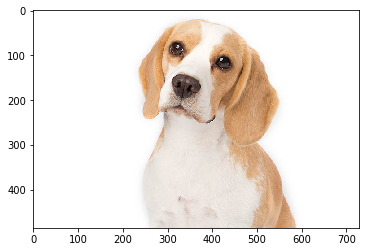

In [73]:
# using pillow to convert from jpg to png
import matplotlib.image as mp_img
import matplotlib.pyplot as plot
import os

filename = "./dog.jpg"

image = mp_img.imread(filename)
print image.shape
plot.imshow(image)
plot.show()

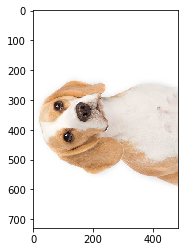

In [75]:
x = tf.Variable(image, name='x')
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # swap the 1 and second axis, leaving rbg values alone
    # can also use transpose_image
    transpose = tf.transpose(x, perm=[1,0,2])
    result = sess.run(transpose)
    plot.imshow(result)
    plot.show()

In [79]:
from PIL import Image
original_image_list = ["./dog.jpg","dog2.jpeg","cat.jpg"]

# Make a queue of file names including all the images form the list
filename_queue = tf.train.string_input_producer(original_image_list)
# create a way to read in an entire image file
image_reader = tf.WholeFileReader()

with tf.Session() as sess:
    # Coordinate class to work with threads and queues
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    image_list = []
    for i in range(len(original_image_list)):
        # Read a whole file from the queue, the first returned value in the tuple
        # is the file name, which we are ignoring
        _, image_file = image_reader.read(filename_queue)
        
        # Decode the image jpg into Tensor which we can then use
        # in training
        image = tf.image.decode_jpeg(image_file)
        image = tf.image.resize_images(image, (224,224))
        image.set_shape((224,224,3))
        image_array = sess.run(image)
        #Image.fromarray(image_array.astype('uint8'), 'RGB').show()
        #expand dims to help determine with image we are refering to
        image_list.append(tf.expand_dims(image_array, 0))
    #finish off the filename queue coordinator
    coord.request_stop()
    coord.join(threads)

# MNIST Data Set

- Great way to get started with image recognition, and pattern recognition
- Large quantatiy of modified standard handwritten digits
- 60k training exampls and 10k examples of test images

## K-nearest-neighbor (KNN)

- A form of supervised learning
- Uses a training set as a model with labels on each entry
- To predict, a new input uses similarity of input to training data to find prediction
### How are similiarities calculated

- Distance measures
- map data to distance measure formulas
    - Euclidean Distance (standard distance formula
    - L1, measures distance as discrete steps, good for discritized data, in 2D A to B = SUM(ABS(diff(A_i,B_i))

In [83]:
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

# store the mnust data from /tmp/data

mnist = input_data.read_data_sets("mnist_data/", one_hot=True)

# Grab the next 5000 training examples
training_digits, training_labels = mnist.train.next_batch(5000)
test_digits, test_labels = mnist.test.next_batch(200)
# A single image is 784 pixels, that can be represented as a single
# vector of 784 element (unwrapping the matrix)
# for training we are specifying the none to be able to collect a list
# of unwrapped images
training_digits_pl = tf.placeholder("float", [None, 784])
testing_digits_pl = tf.placeholder("float", [784])
# compare the test image to all the training images using L1
l1_distance = tf.abs(tf.add(training_digits_pl, tf.negative(testing_digits_pl)))
distance = tf.reduce_sum(l1_distance, axis=1)
pred = tf.arg_min(distance, 0)
accuracy = 0.

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    #loop over the test data
    for i in range(len(test_digits)):
        nn_index = sess.run(pred,\
            feed_dict={training_digits_pl: training_digits,\
                       testing_digits_pl: test_digits[i,:]})
        print("Test", i, "Prediction:",np.argmax(training_labels[nn_index]),\
             "True Label: ", np.argmax(test_labels[i]))
        if np.argmax(training_labels[nn_index]) == np.argmax(test_labels[i]):
            accuracy= accuracy+1.
    print "Accuracy: ", accuracy/200.

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
('Test', 0, 'Prediction:', 7, 'True Label: ', 7)
('Test', 1, 'Prediction:', 0, 'True Label: ', 0)
('Test', 2, 'Prediction:', 1, 'True Label: ', 1)
('Test', 3, 'Prediction:', 2, 'True Label: ', 2)
('Test', 4, 'Prediction:', 1, 'True Label: ', 7)
('Test', 5, 'Prediction:', 9, 'True Label: ', 9)
('Test', 6, 'Prediction:', 3, 'True Label: ', 3)
('Test', 7, 'Prediction:', 5, 'True Label: ', 5)
('Test', 8, 'Prediction:', 9, 'True Label: ', 9)
('Test', 9, 'Prediction:', 0, 'True Label: ', 2)
('Test', 10, 'Prediction:', 0, 'True Label: ', 0)
('Test', 11, 'Prediction:', 5, 'True Label: ', 5)
('Test', 12, 'Prediction:', 5, 'True Label: ', 8)
('Test', 13, 'Prediction:', 4, 'True Label: ', 4)
('Test', 14, 'Prediction:', 8, 'True Label: ', 8)
('Test', 15, 'Prediction:', 9, 'True Label: ', 9)
('Test', 16, 'Pr

('Test', 160, 'Prediction:', 8, 'True Label: ', 8)
('Test', 161, 'Prediction:', 8, 'True Label: ', 8)
('Test', 162, 'Prediction:', 0, 'True Label: ', 0)
('Test', 163, 'Prediction:', 8, 'True Label: ', 8)
('Test', 164, 'Prediction:', 5, 'True Label: ', 5)
('Test', 165, 'Prediction:', 1, 'True Label: ', 1)
('Test', 166, 'Prediction:', 0, 'True Label: ', 0)
('Test', 167, 'Prediction:', 5, 'True Label: ', 5)
('Test', 168, 'Prediction:', 6, 'True Label: ', 6)
('Test', 169, 'Prediction:', 9, 'True Label: ', 9)
('Test', 170, 'Prediction:', 2, 'True Label: ', 2)
('Test', 171, 'Prediction:', 3, 'True Label: ', 3)
('Test', 172, 'Prediction:', 9, 'True Label: ', 9)
('Test', 173, 'Prediction:', 3, 'True Label: ', 3)
('Test', 174, 'Prediction:', 0, 'True Label: ', 0)
('Test', 175, 'Prediction:', 3, 'True Label: ', 3)
('Test', 176, 'Prediction:', 1, 'True Label: ', 1)
('Test', 177, 'Prediction:', 7, 'True Label: ', 7)
('Test', 178, 'Prediction:', 8, 'True Label: ', 8)
('Test', 179, 'Prediction:', 1,